# Monte Carlo Integration


### Dominic Scalies & Eun Ju Jong

### CIS-397

### 03/06/2018

### Professor Hallenbeck

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random as rd
import decimal as dm

In [2]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

Citation 1: https://en.wikipedia.org/wiki/Monte_Carlo_integration

### Monte Carlo Integration is a technique for numerical integration using random numbers. 
What the Monte Carlo integration addresses is the computation of a multidimensional definitre integral
<br>
<br>
1) Pick a function and determine a range of x values (x_max, x_min).
<br>
<br>
2) Generate N random points for x and y.
<br>
<br>
3) For each random x_i, check if random y_i < f(x_i) and count the number of times, C, this happens.
<br>
<br>
4) The area is
<br>
<br>
$\ \ \ \frac{C}{N}\times(x_{max} - x_{min})\times y_{max}$
### Integrating a function:
$f(x) = sin(x)$

In [3]:
def sin_x(x):
    return abs(np.sin(x))

Prior to the integration, we will set the range of x to be from 0 to $2\pi$ and the the range of y to be from 0 to 1. 
<br>
<br>
In theory, we have to calculate the maximum value of y by inputting all the x values into the function and evaluate which value of y is the largest one. 
<br>
<br>
Since we will get the average of the sums of the areas within the range of x and y, the process can be simplified as having a set value of y as a maximum.
<br>
<br>
In this case, the maximum value of y will be 1. 

In [4]:
def monte_carlo_int(f, x_min, x_max, n):
    y = []
    x = []
    y_max = 1
    count = 0
    
    for i in range(n):
        x.append(np.random.uniform(x_min, x_max, 1))
        y.append(np.random.uniform(0, y_max, 1))
        
        if y[i] <= y_max:
            if y[i] > 0 and f(x[i]) > 0 and y[i] < f(x[i]):
                count += 1
                      
    area = count / n * (x_max - x_min) * y_max       
    return area

In [5]:
print(monte_carlo_int(sin_x, 0, 2*np.pi, 100))

4.084070449666731


In [6]:
def trapezoidal(f, a, b, n):
    n = int(n)
    h = float(b - a) / n
    area = 0.0
    
    for i in range(0, n + 1):
        if i == 0:
            area = f(a)*h/2.0
        if i == n:
            area += f(b)*h/2.0
        else:
            area += f(a + i*h)*h
    return area

In [7]:
def simpsons(f, a, b, n):
    n = int(n)
    
    if n%2 == 0:
        n += 1
        
    h = float(b - a) / n
    area = 0.0
    
    for i in range(0, n + 1):
        if i == 0:
            area = f(a)
        elif i == n:
            area += f(b)
        elif i%2 == 0:
            area += f(a + i*h)*2
        elif i%2 == 1:
            area += f(a + i*h)*4
            
    return area*h/3.0

In [9]:
print(trapezoidal(sin_x, 0, np.pi, 1000))
print(simpsons(sin_x, 0, np.pi, 1000))
print(monte_carlo_int(sin_x, 0, np.pi, 1000))

1.99999835507
1.99999835835
1.9415042599184922


In [10]:
def monte_carlo_f_x(f, x_min, x_max, n):
    n = int(n)
    y = []
    x = []
    y_max = 1
    
    for i in range(n):
        x.append(np.random.uniform(x_min, x_max, 1))
        y.append(np.random.uniform(0, y_max, 1))
                  
    return y

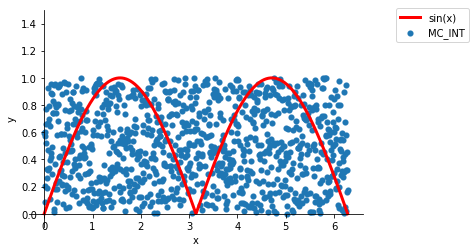

In [11]:
x = np.linspace(0, 2*np.pi, 1000)
    
plt.scatter(x, monte_carlo_f_x(sin_x, 0, 2*np.pi, 1000), label = 'MC_INT', linewidth = 0.1)
plt.plot(x, abs(np.sin(x)), label = 'sin(x)', linewidth = 3, color = 'red')

plt.ylim(-.1, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.33, 1.03))
movespines()

plt.show()

Citation:
<br>
http://www.palisade.com/risk/monte_carlo_simulation.asp
<br>
https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration

### How the error on the Monte Carlo integrator goes to 0 with N
$error\ $ vs. $\frac{1}{\sqrt{N}}$ for $sin(x)$ in which N is the number of x and y values:

In [12]:
def sin_x_int(x):
    return - np.cos(x) - (-np.cos(0))

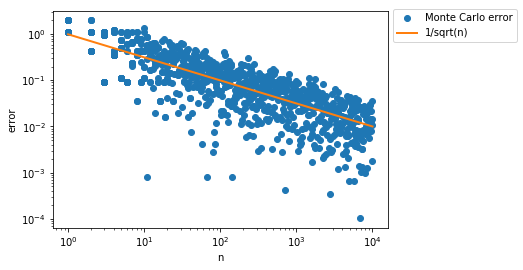

In [69]:
n = 10**np.linspace(0, 4, 1000)
n = n.astype(int)

MC_error = []

for i in n:
    MC_error.append(abs(monte_carlo_int(sin_x, 0, np.pi, i) - sin_x_int(np.pi)))

plt.loglog(n, MC_error, 'o', label = 'Monte Carlo error', linewidth = 2)
plt.loglog(n, 1/np.sqrt(n), label = '1/sqrt(n)', linewidth = 2)

plt.xlabel('n')
plt.ylabel('error')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.40, 1.03))

plt.show()

Citation: http://www.palisade.com/risk/monte_carlo_simulation.asp

### Risk Analysis Using Monte Carlo Simulation: 

Monte Carlo simulation lets you see all the possible outcomes of your decisions and assess the impact of risk, allowing for better decision making under uncertainty.

#### Imagine you are the marketing manager for a firm that is planning to introduce a new product; a new phone.
If you want to determine an appropriate price for the new phone, you can set a price range an evaluate profitability of the points of price. 
<br>
<br>
Prediction:
<br>
<br>
$Q\ \ \ Fixed\ Cost\ \ \ Variable\ Cost\ \ \ Total\ Cost\ P$
<br>
$100\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 500\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 550\ \ \ \ \ \ \ \ \ \ \ \ 150$
<br>
$200\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 900\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 950\ \ \ \ \ \ \ \ \ \ \ \ 300$
<br>
$300\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 1300\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 1350\ \ \ \ \ \ \ \ \ \ 450$
<br>
$400\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 1300\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 1350\ \ \ \ \ \ \ \ \ \ 600$
<br>
$500\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 1700\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 1750\ \ \ \ \ \ \ \ \ \ 750$
<br>
$600\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 2100\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 2150\ \ \ \ \ \ \ \ \ \ 900$
<br>
$700\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 2500\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 2550\ \ \ \ \ \ \ \ \ \ 1050$
<br>
$800\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 2900\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 2950\ \ \ \ \ \ \ \ \ \ 1200$
<br>
$900\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ \ 3300\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 3350\ \ \ \ \ \ \ \ \ \ 1350$
<br>
$1000\ \ \ \ 50\ \ \ \ \ \ \ \ \ \ \ \ \ 3700\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 3750\ \ \ \ \ \ \ \ \ \ \ 1500$
<br>
<br>
$Profit = (\frac{TR}{Q} - \frac{TC}{Q})\ $x$\ Q$
<br>
<br>
$Profit = (P - ATC)\ $x$\ Q$
<br>
<br>
$Profit = (x - \bar{x}) \times q$
<br>
<br>
You can estimate:
- The most profitable price point to sell the phone
- The quantity to be produced

In [39]:
def profit(x):
    return (150*x - (550 + (400*(x - 1)))/x)*(x*100)

In [62]:
def monte_carlo_f_x(f, x_min, x_max, n):
    n = int(n)
    y = []
    x = []
    y_max = 1000000
    
    for i in range(n):
        x.append(np.random.uniform(x_min, x_max, 1))
        y.append(np.random.uniform(0, y_max, 1))
                  
    return y

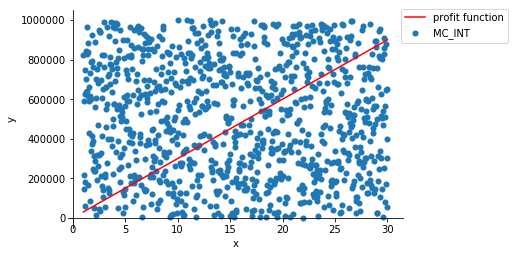

In [66]:
n = 1000
x = np.linspace(1, 30, n)
y = profit(x, n)

plt.scatter(x, monte_carlo_f_x(n, 0, 2*np.pi, n), label = 'MC_INT', linewidth = .05)
plt.plot(x, 30000*x - 400, label = 'profit function', color = 'red')

#plt.ylim(-.1, 1.2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.33, 1.03))
movespines()

plt.show()

Citation: 
<br>
http://www.palisade.com/risk/monte_carlo_simulation.asp
<br>
https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration
<br>
https://www.solver.com/monte-carlo-simulation-example